<a href="https://colab.research.google.com/github/sbarreto10/AnalisisNumerico/blob/main/TP1-SEL-Gauss-directo/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Los (*) indican que la celda debe compilarse obligatoriamente

In [1]:
#@title LIBRERÍAS (*)

import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
#@title INTERFAZ DE TABLAS (*)


# RECIBE: 
# - EL TAMAÑO DE LA TABLA COMO UNA DUPLA (f,c)
# - UN DICCIONARIO DE LA FORMA {nombre_columna: lista_columna} (OPCIONAL, SINO SE CREA UNA TABLA DE CEROS)
# - UNA LISTA CON LOS NOMBRES DE LAS FILAS (OPCIONAL, SINO SE ENUMERAN CONVENCIONALMENTE)
# - UNA LISTA CON LOS NOMBRES DE LAS COLUMNAS (OPCIONAL, SINO SE ENUMERAN CONVENCIONALMENTE)
# DEVUELVE UNA TABLA CON CELDAS nulas

def nueva_tabla(dim=None, data=None, nombres_filas=None, nombres_columnas=None):
  if data:
    tabla = pd.DataFrame(data=data, dtype=float)
  else:
    tabla = pd.DataFrame(data={i: [0 for j in range(dim[0])] for i in range(dim[1])}, dtype=float)
  if nombres_columnas:
    tabla.columns = nombres_columnas
  else:
    if not data:
      tabla.columns = tabla.columns + 1
  if nombres_filas:
    tabla.index = nombres_filas
  else:
    tabla.index = tabla.index + 1
  return tabla 


# RECIBE UNA TABLA Y DEVUELVE UNA COPIA

def copiar_tabla(tabla):
  return tabla.copy()


# RECIBE: 
# -UNA TABLA
# -LA CELDA COMO UNA DUPLA (f,c)
# -EL NUEVO VALOR A INSERTAR 

def editar_celda(tabla, celda, nuevo):
  tabla.loc[celda[0],celda[1]] = nuevo


# RECIBE: 
# -UNA TABLA
# -EL INICIO DE LA SUBTABLA COMO UNA DUPLA (f,c)
# -EL FIN DE LA SUBTABLA COMO UNA DUPLA (f,c)
# -EL NUEVO VALOR A INSERTAR EN TODAS ESAS CELDAS
def editar_subtabla(tabla, ini, fin, nuevo):
  tabla.loc[ini[0]:fin[0], ini[1]:fin[1]] = nuevo

def editar_subtabla_por_indice(tabla, ini, fin, nuevo):
  tabla.iloc[(ini[0]-1):ini[1], (fin[0]-1):fin[1]] = nuevo


# RECIBE UNA TABLA, UN NOMBRE DE FILA Y UNA LISTA
# ACTUALIZA LA FILA EN LA TABLA CON LA LISTA PASADA

def asignar_fila(tabla, fila, nueva_fila):
  tabla.loc[fila, :] = nueva_fila


# RECIBE UNA TABLA, UN NOMBRE DE COLUMNA Y UNA LISTA
# ACTUALIZA LA COLUMNA EN LA TABLA CON LA LISTA PASADA

def asignar_columna(tabla, columna, nueva_columna):
  tabla.loc[:, columna] = nueva_columna


# RECIBE UNA LISTA DE TABLAS Y DEVUELVE UNA NUEVA TABLA CONCATENÁNDOLAS HORIZAONTALMENTE

def concatenar_tablas_hor(lista_tablas):
  return pd.concat(lista_tablas, axis=1)


# RECIBE:
# -UNA TABLA
# -DOS LISTAS: FILAS Y COLUMNAS (OPCIONALES, DEBE ESPECIFICARSE EL NOMBRE DE LOS PARÁMETROS EN LA LLAMADA)
# Y MODIFICA LOS NOMBRES DE LAS FILAS Y COLUMNAS DE UNA TABLA

def renombrar_tabla(tabla, filas=None, columnas=None):
  if filas:
    tabla.index = filas
  if columnas:
    tabla.columns = columnas


# RECIBE UNA LISTA DE RESULTADOS (VECTORES) Y UN PATH Y GUARDA LOS RESULTADOS EN DICHO PATH

def guardar_resultados_como_csv(res, dir):

  df = pd.DataFrame()

  for i in range(len(res)):
    if type(res[i])==list:
      df = pd.concat([df, pd.Series(res[i])], axis=1)
    else:
      df = pd.concat([df, res[i]], axis=1)

  # Guardar el dataframe en un archivo CSV
  df.transpose().to_csv(dir, index=False, header=False, sep=";")


# RECIBE UNA TABLA Y UN STRING Y LA GUARDA COMO ARCHIVO CSV CON ESE NOMBRE

def tabla_a_csv(tabla, dir):
  tabla.to_csv(dir, index=False)

# RECIBE UNA TABLA Y DEVUELVE SUS DIMENSIONES EN FORMA DE DUPLA

def tabla_dimension(tabla):
  return tabla.shape


# RECIBE UNA TABLA Y UNA CELDA EN FORMA DE DUPLA
# DEVUELVE EL VALOR EN DICHA POSICIÓN

def tabla_celda(tabla, celda):
  return tabla.loc[celda[0],celda[1]]


# RECIBE:
# -UNA TABLA 
# -UN NOMBRE/INDICE DE FILA
# -TRUE (OPCIONAL) INDICANDO SI ES POR INDICE
# DEVUELVE LA FILA EN ESA POSICIÓN EN FORMA DE LISTA

def tabla_fila(tabla, f, por_indice=False):
  return tabla.loc[f,:].tolist() if not por_indice else tabla.iloc[f-1,:].tolist()


# RECIBE:
# -UNA TABLA 
# -UN NOMBRE/INDICE DE COLUMNA
# -TRUE (OPCIONAL) INDICANDO SI ES POR INDICE
# DEVUELVE LA COLUMNA EN ESA POSICIÓN EN FORMA DE LISTA

def tabla_columna(tabla, c, por_indice=False):
  return tabla.loc[:,c].tolist() if not por_indice else tabla.iloc[:,c-1].tolist()


# RECIBE UNA TABLA Y DEVUELVE UNA LISTA ORDENADA CON LOS NOMBRES DE SUS FILAS

def tabla_cantidad_filas(tabla):
  return tabla.index.size


# RECIBE UNA TABLA Y DEVUELVE UNA LISTA ORDENADA CON LOS NOMBRES DE SUS COLUMNAS
def tabla_cantidad_columnas(tabla):
  return tabla.columns.size

In [3]:
#@title FUNCIONES (*)




# RECIBE DOS LISTAS Y DEVUELVE SU PRODUCTO ESCALAR

def producto_escalar(x,y):
  if len(x) != len(y):
    return None
  sum = 0
  for i in range(len(x)):
    sum += x[i]*y[i]
  return sum




# RECIBE UN NUMERO Y DEVUELVE EL LOG_10 DE SU INVERSO

def max_digitos(x):
  return math.log(1/x if x != 0 else 1E16, 10)




# RECIBE UNA LISTA DE NUMEROS (DE ORDEN NEGATIVO) Y UNA SEMILLA (0)
# ENLISTA LOS RESULTADOS DE SUMARLE Y LUEGO RESTARLE 1 A ESOS NUMEROS
# SE DETIENE CUANDO EL RESULTADO ES NULO

def hallar_maxima_precision(e, i, prec=16):
  a = round(e[i], prec)+1
  a = round(a-1, prec)
  print(str(e[i]) + ": "+ str(a))
  if a == 0:
    return a
  else:
    if hallar_maxima_precision(e, i+1, prec) == 0:
      max_prec = round(max_digitos(e[i]))
      print("Máxima cantidad de decimales = " + str(max_prec))




# RECIBE UN NUMERO Y UNA LISTA
# DEVUELVE UNA NUEVA LISTA MULTIPLICADA POR DICHO NÚMERO

def lista_por_escalar(fila, x):
  return [x*i for i in fila]




# RECIBE DOS LISTAS
# DEVUELVE SU SUMA, O NO DEVUELVE NADA SI NO COINCIDEN SUS LARGOS

def sumar_filas(l1, l2):
  if len(l1) != len(l2):
    return None
  return [l1[i] + l2[i] for i in range(len(l1))]




# RECIBE DOS LISTAS
# DEVUELVE SU RESTA, O NO DEVUELVE NADA SI NO COINCIDEN SUS LARGOS

def restar_listas(l1, l2):
  if len(l1) != len(l2):
    return None
  return [l1[i] - l2[i] for i in range(len(l1))]




# RECIBE:
# TABLA MATRIZ
# TABLA VECTOR
# DIMENSIÓN
# PRECISIÓN (OPCIONAL)
# DEVUELVE EL RESULTADO DE MULTIPLICAR LA MATRIZ POR EL VECTOR EN FORMA DE TABLA

def matriz_por_vector(A,x,n, prec=16):

  b = nueva_tabla((n,1))

  for i in range(1, n+1):
    prod = producto_escalar(tabla_fila(A,i),tabla_columna(x,1))
    editar_celda(b, (i,1), round(prod, prec))

  return b




# WRAPPER RECURSIVO DE LA FUNCIÓN DE LA ELIMINACIÓN GAUSSIANA
# EN CADA ITERACIÓN SE ELIMINAN ELEMENTOS DEBAJO DE LA DIAGONAL PRINCIPAL DE A, MODIFICANDO A y b
# j ∈ ℕ[1,n] {j++}

def _eliminacion_gaussiana(A, b, n, j, prec=16, LU=False, L=None):
  if LU and j == 1:
    L = nueva_tabla((n,n))
  if j > n:
    if not LU:
      return
    else:
      U = copiar_tabla(A)
      for i in range(1,n+1):
        editar_celda(L, (i,i), 1)
        for k in range(i+1,n+1):
          editar_celda(U, (k,i), 0)
      return L, U
  for i in range(j+1, n+1):
    mu = tabla_celda(A, (i,j))/tabla_celda(A, (j,j)) # Multiplicador

    fila_mu = tabla_fila(A, j)[j:] # Fila fija de A (j)
    fila = tabla_fila(A, i)[j:] # Fila a editar de A (i)
    operacion = restar_listas(fila, lista_por_escalar(fila_mu, mu))
    operacion = [round(i, prec) for i in operacion]
    editar_subtabla(A, (i,j+1), (i,n), operacion)

    if not LU:
      b_mu = tabla_celda(b, (j,1))  # Celda fija de b (j)
      b_celda = tabla_celda(b,(i,1)) # Celda a editar de b (i)
      operacion = round(b_celda - mu*b_mu, prec)
      editar_celda(b, (i,1), operacion)
    else:
      editar_celda(L, (i,j), mu)

  return _eliminacion_gaussiana(A, b, n, j+1, prec, LU, L)




# RECIBE:
# -TABLA MATRIZ DE COEFICIENTES
# -TABLA VECTOR DE TÉRMINOS INDEPENDIENTES
# -DIMENSIÓN DEL PROBLEMA
# -NÚMERO DE COLUMNA DE ITERACIÓN
# -PRECISIÓN (OPCIONAL)
# -LU = True (OPCIONAL)
# DEVUELVE UNA DUPLA (L,U) SI SE ACTIVA EL PARÁMETRO LU
# DE LO CONTRARIO, NO DEVUELVE NADA, PERO A y b SE VEN MODIFICADOS

def eliminacion_gaussiana(A, b, n, prec=16, LU=False, L=None):
  if LU:
    return _eliminacion_gaussiana(A, b, n, 1, prec, LU, L)
  else:
    _eliminacion_gaussiana(A, b, n, 1, prec, LU, L)




# WRAPPER RECURSIVO DE LA FUNCIÓN DE LA TRIANGULACION INVERSA
# CADA PASO CALCULA UNA INCÓGNITA Xi
# i ∈ ℕ[n,1] {i--}

def _triangulacion_inversa(A, b, x, n, i, prec=16):
  if i < 1:
    return x

  # Xi = Bi
  xi = tabla_celda(b, (i,1))

  # Xi -= Σ(Aij*Xj) {desde i+1 hasta n}
  for j in range(i+1, n+1):
    Aij_xj = tabla_celda(A, (i,j)) * tabla_celda(x, (j,1))
    xi = xi - Aij_xj

  # ⁂ Xi = Bi - Σ(Aij*Xj)

  # Xi = Xi/Aii
  Aii = tabla_celda(A, (i,i))
  editar_celda(x, (i,1), round(xi/Aii, prec))

  return _triangulacion_inversa(A, b, x, n, i-1, prec)




# RECIBE LAS TABLAS:
# -MATRIZ DE COEFICIENTES TRIANGULAR SUPERIOR 
# -VECTOR DE TÉRMINOS INDEPENDIENTES
# -VECTOR DE INCÓGNITAS (VACÍA)
# -LA DIMENSIÓN DEL PROBLEMA
# DEVUELVE LA SOLUCIÓN DEL VECTOR DE INCÓGNITAS

def triangulacion_inversa(A, b, n, prec=16):
  x = nueva_tabla((n,1))
  return _triangulacion_inversa(A, b, x, n, n, prec)




# RECIBE LAS TABLAS:
# -MATRIZ DE COEFICIENTES (n*n)
# -VECTOR DE TÉRMINOS INDEPENDIENTES (n*1)
# DEVUELVE EL VECTOR DE INCÓGNITAS RESUELTO POR GAUSS (EN FORMA DE TABLA)

def resolver_por_Gauss(coef, indep, prec=16):
  A = copiar_tabla(coef)
  b = copiar_tabla(indep)
  n = tabla_cantidad_filas(A)

  eliminacion_gaussiana(A, b, n, prec)

  # ⁂ A es triangular superior

  x = tabla_columna(triangulacion_inversa(A, b, n, prec), 1)
  return nueva_tabla(data={1: x})




# RECIBE UNA LISTA Y DEVUELVE SU NORMA EUCLIDEANA ( √(Σx_i^2) )

def norma_2(x, i=0, sum=0):
  if i == len(x):
    return math.sqrt(sum)
  sum += pow(x[i],2)
  return norma_2(x, i+1, sum)




# RECIBE UN VECTOR EXACTO (v) Y UN VECTOR APROXIMADO (𝓥), EN FORMA DE TABLAS
# DEVUELVE LA VARIACIÓN RELATIVA (| v - 𝓥 | / | v |)
# ESTA FUNCIÓN SE USA PARA CALCULAR TANTO EL ERROR RELATIVO COMO EL RESIDUO RELATIVO
# Obs: (LA VARIACIÓN RELATIVA DE LA COMPONENTE i SE CALCULA CON EL VALOR EXACTO x_i EN EL DENOMINADOR,
# PARA EVITAR LA DIVISIÓN POR CERO, CUANDO x_i = 0, LO CONVERTIMOS EN UN ɛ PEQUEÑO)

def variacion_relativa(v, v_aprox):
  norma_v = norma_2(tabla_columna(v, 1))
  denom = norma_v if norma_v != 0 else 1E-15
  return norma_2(tabla_columna(v - v_aprox, 1)) / denom




#

def LU(coef, prec=16):
  A = copiar_tabla(coef)
  n = tabla_cantidad_filas(A)
  return eliminacion_gaussiana(A, None, n, prec, LU=True)




#

def multiplicar_matrices(A,B):
  n = tabla_cantidad_filas(A)
  C = nueva_tabla((n,n))
  for i in range(1,n+1):
    B_i = nueva_tabla(data={1: tabla_columna(B,i)})
    A_Bi = matriz_por_vector(A,B_i,n)
    asignar_columna(C,i,A_Bi)
  return C




# 

def condicionamiento(dx, x, t=15):
  norma_dx = norma_2(tabla_columna(dx, 1))
  norma_x = norma_2(tabla_columna(x, 1))
  escala = pow(10,t)
  norma_x = max(norma_x, 1/escala) if norma_x == 0 else norma_x
  return (norma_dx/norma_x)*escala

#PRUEBAS (VAGAS) DE LA INTERFAZ#

In [ ]:
t1 = nueva_tabla((3,3))
t1

In [ ]:
editar_celda(t1, (2,2), 67)
editar_celda(t1, (2,1), 2)
editar_celda(t1, (3,3), 3)
t1

In [ ]:
t2 = nueva_tabla((5,5), nombres_filas=[1, 5, 10, 15, 20])
editar_subtabla(t2, (1,1), (20,5), None)
t2

In [ ]:
editar_subtabla(t2, (2,2), (15,4), 3.14)
t2

In [ ]:
t3 = nueva_tabla((5,2), nombres_columnas=["c1","c2"], nombres_filas=["a", "b", "c", "d", "e"])
editar_subtabla_por_indice(t3, (1,2), (1,2), None)
editar_subtabla_por_indice(t3, (4,5), (1,2), None)
t3

#TP#

In [9]:
#@title PREPARADO PREVIO DE A, b y x (*)

# A_n es una lista con las matrices A ∈ R[nxn] (desde la de R3x3 hasta la de R12x12)
A_n = []
# exactos es una lista con los x exactos ∈ Rn (desde el de R3 hasta el de R12)
exactos = []
# b_n es una lista con los vectores b ∈ Rn (desde el de R3 hasta el de R12)
b_n = []

for n in range(3, 13):

  A, x = nueva_tabla((n,n)), nueva_tabla((n,1))

  # Llenado de A
  for i in range(1,n+1):
    for j in range(1,n+1):
      editar_celda(A, (i,j), 1/(i+j-1))

  # Llenado de x
  for i in range(1, n+1):
    elemento = math.cos((2*math.pi)/(n-1))*(i-1)
    editar_celda(x, (i,1), round(elemento, 15))

  # Cálculo de b
  b = matriz_por_vector(A, x, n)

  A_n.append(A)
  b_n.append(b)
  exactos.append(x)

In [10]:
#@title a) MÁXIMA CANTIDAD DE DÍGITOS CON DOBLE PRECISIÓN

prec = [pow(10, -n) for n in range(32)]

hallar_maxima_precision(prec, 1)
print("\n\n\n\n\n")

0.1: 0.1000000000000001
0.01: 0.01
0.001: 0.0009999999999999
0.0001: 0.0001
1e-05: 1.00000000001e-05
1e-06: 9.999999999e-07
1e-07: 1.000000001e-07
1e-08: 9.9999999e-09
1e-09: 1.0000001e-09
1e-10: 1e-10
1e-11: 1e-11
1e-12: 1.0001e-12
1e-13: 9.99e-14
1e-14: 1e-14
1e-15: 1.1e-15
1e-16: 0.0
Máxima cantidad de decimales = 15








In [11]:
#@title b) ESTIMACIÓN DE X POR GAUSS CON DOBLE PORECISIÓN (*)

estimados_2p = [resolver_por_Gauss(A_n[i], b_n[i]) for i in range(10)]

In [12]:
#@title c) a) MÁXIMA CANTIDAD DE DÍGITOS CON SIMPLE PRECISIÓN

prec = [pow(10, -n) for n in range(32)]

hallar_maxima_precision(prec, 1, 8)
print("\n\n\n\n\n")

0.1: 0.1
0.01: 0.01
0.001: 0.001
0.0001: 0.0001
1e-05: 1e-05
1e-06: 1e-06
1e-07: 1e-07
1e-08: 1e-08
1e-09: 0.0
Máxima cantidad de decimales = 8








In [13]:
#@title c) b) ESTIMACIÓN DE X POR GAUSS CON SIMPLE PRECISIÓN (*)

estimados_1p = [resolver_por_Gauss(A_n[i], b_n[i], 8) for i in range(10)]

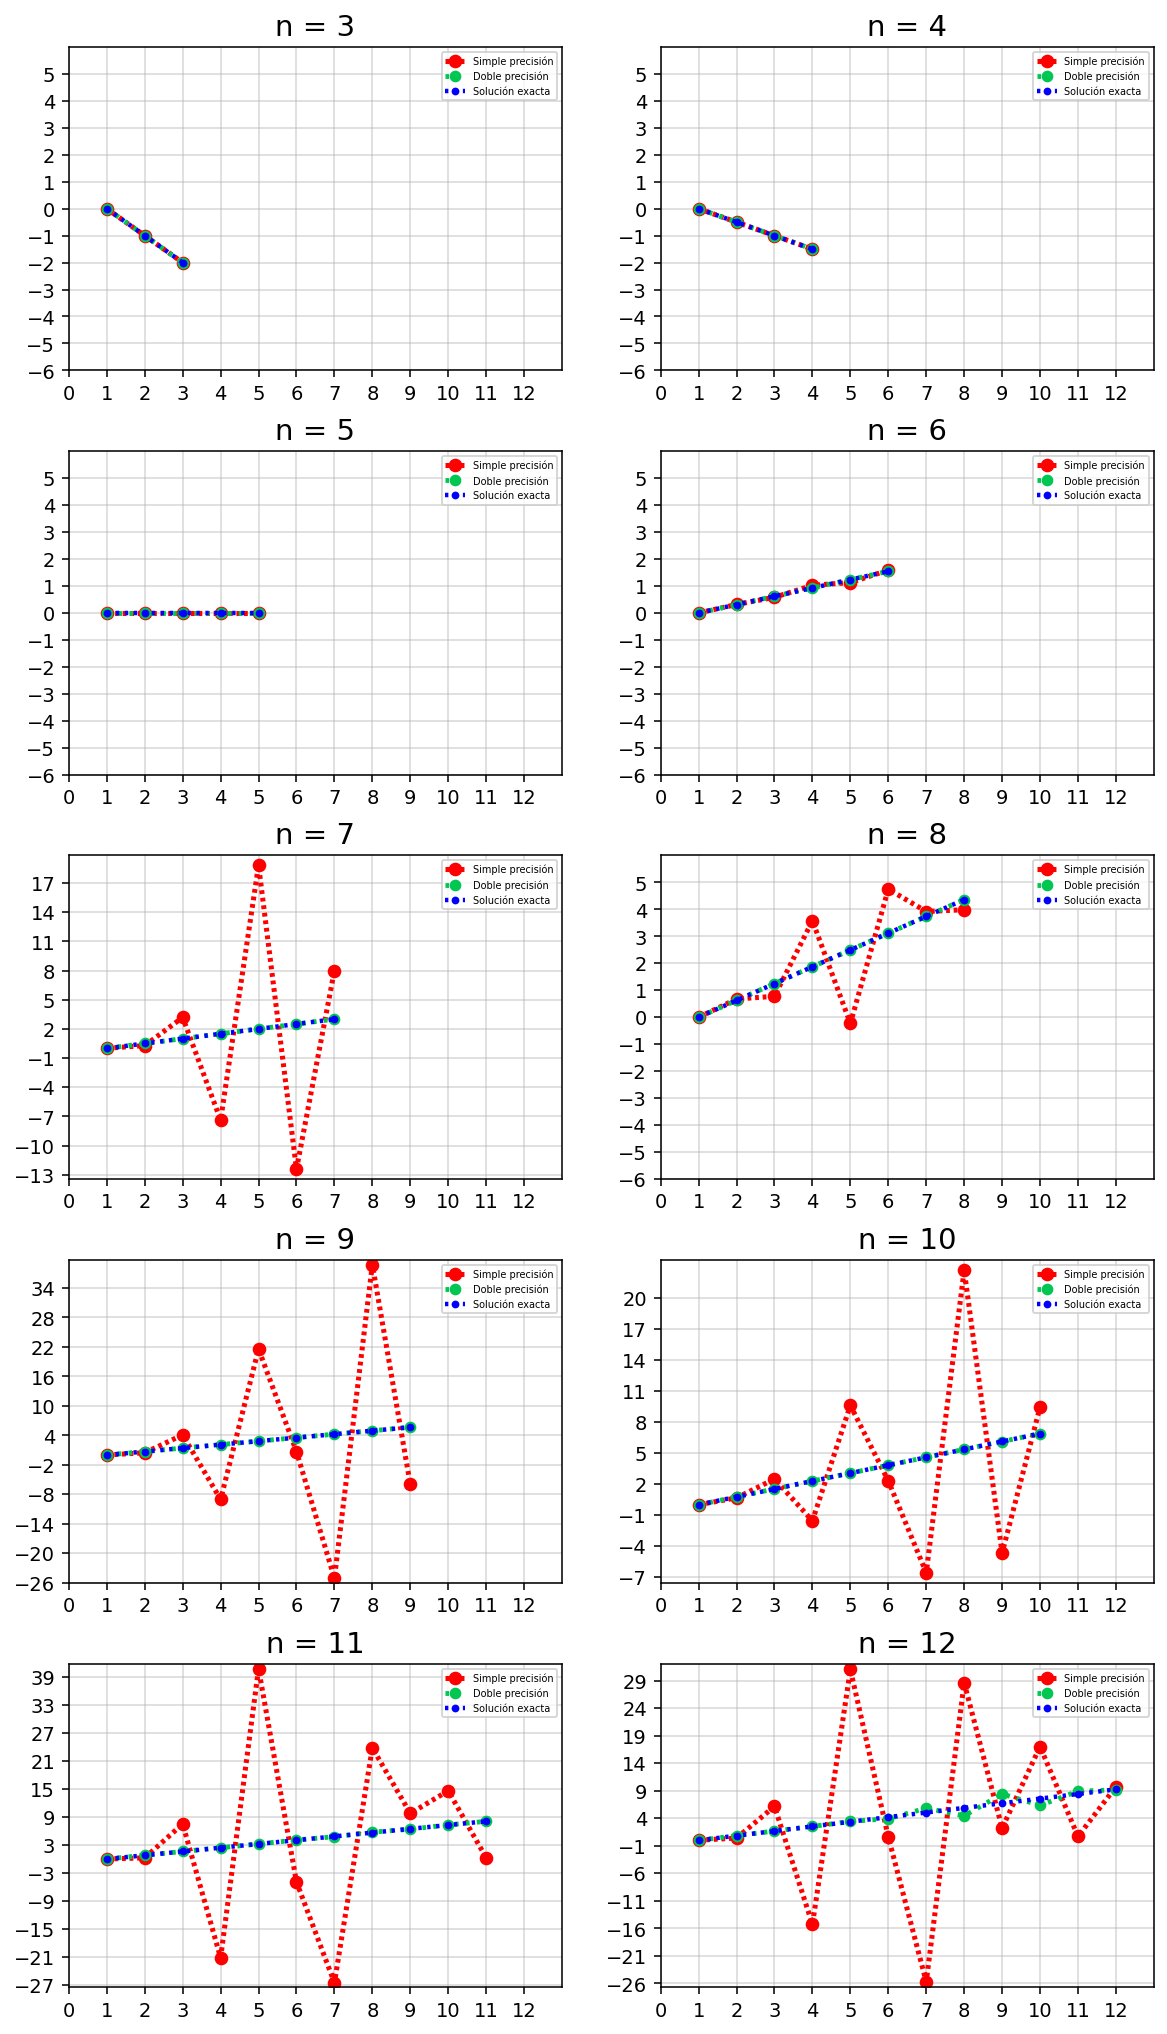

In [14]:
#@title d) GRÁFICOS DE COMPARACIONES DE VALORES EXACTOS E INEXACTOS DE LAS COMPONENTES DE LA SOLUCIÓN

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,18), dpi=140, gridspec_kw={'hspace': 0.25, 'wspace': 0.2})

for i, ax in enumerate(axs.flat):
  if i > 9:
    break
  xlim = (0,13)
  ymin , ymax = min(estimados_1p[i][1]), max(estimados_1p[i][1])
  ylim = (-6 if abs(ymin)<5 else ymin-1, 6 if abs(ymax)<5 else ymax+1)
  ax.plot(estimados_1p[i], lw=2.6, label='Simple precisión', linestyle='dashed', marker='o', dashes=(0.75, 0.75), color="red")
  ax.plot(estimados_2p[i], lw=2.5, label='Doble precisión', linestyle='dashed', marker='o', markersize=5, dashes=(0.75, 1.5), color="#01C752")
  ax.plot(exactos[i], lw=2.3, label='Solución exacta', linestyle='dashed', marker='o', markersize=3, dashes=(0.75, 1.25), color="blue")
  ax.grid(True, alpha=0.5)
  ax.set_title(f"n = {i+3}", fontsize=15)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ax.set_xticks(range(xlim[1]))
  ax.set_yticks(range(int(ylim[0]), int(ylim[1]), int((ylim[1]-ylim[0])/10)))
  ax.legend(fontsize=5)

plt.show()

In [16]:
#@title e) CÁLCULO DEL RESIDUO RELATIVO Y EL ERROR RELATIVO (*)

# Cálculo de los todos los b aproximados con simple precisión
b_1p = [matriz_por_vector(A_n[i], estimados_1p[i], i+3, 8) for i in range(10)]

# Cálculo de los todos los b aproximados con doble precisión
b_2p = [matriz_por_vector(A_n[i], estimados_2p[i], i+3) for i in range(10)]

# Cálculo de todos los residuos relativos con simple precisión
rr_1p = [variacion_relativa(b_n[i], b_1p[i]) for i in range(10)]

# Cálculo de todos los residuos relativos con doble precisión
rr_2p = [variacion_relativa(b_n[i], b_2p[i]) for i in range(10)]

# Cálculo de todos los errores relativos con simple precisión
er_1p = [variacion_relativa(exactos[i], estimados_1p[i]) for i in range(10)]

# Cálculo de todos los errores relativos con doble precisión
er_2p = [variacion_relativa(exactos[i], estimados_2p[i]) for i in range(10)]

# Creación de la tabla con errores y residuos en diferentes precisiones
tabla_er_rr = [[er_1p[i], er_2p[i], rr_1p[i], rr_2p[i]] for i in range(10)]

<ipython-input-30-42444808d8be>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dims, rotation=90, fontsize=8)


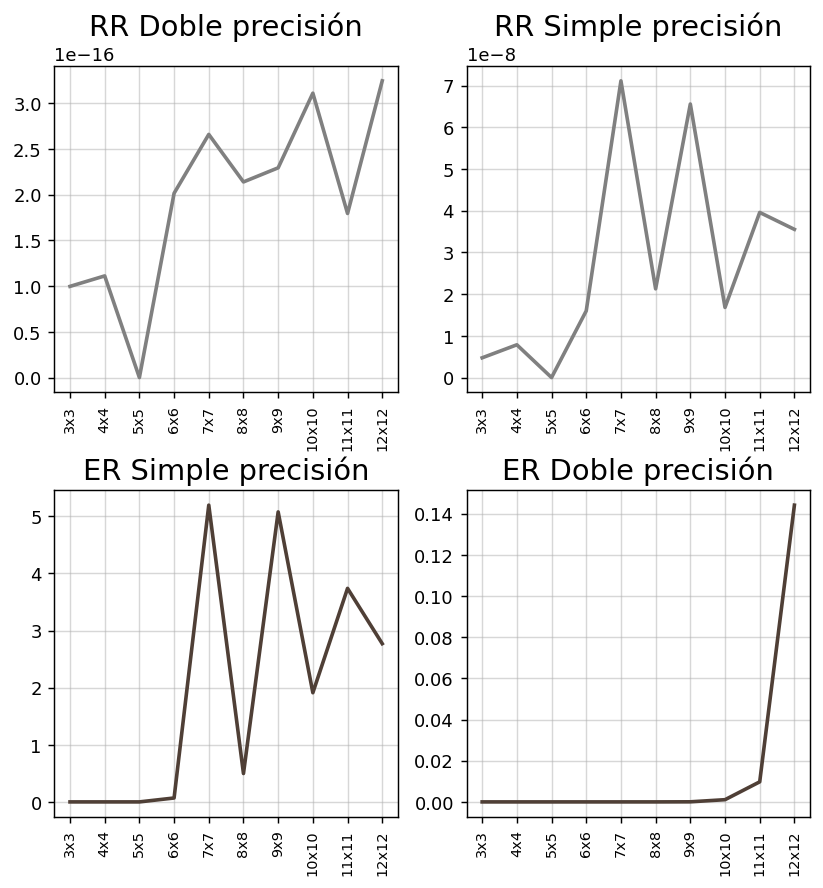

In [30]:
#@title extra) GRÁFICOS DE EVOLUCIONES DE LOS ERRORES Y RESIDUOS RELATIVOS CON DIFERENTES PRECISIONES

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7.5,7.5), dpi=130, gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

dims = [str(i)+"x"+str(i) for i in range(3,13)]
axs[0,0].plot(dims, rr_2p, lw=2, color="grey")
axs[0,0].set_title('RR Doble precisión', fontsize=16)
axs[0,1].plot(dims, rr_1p, lw=2, color="grey")
axs[0,1].set_title('RR Simple precisión', fontsize=16)
axs[1,0].plot(dims, er_1p, lw=2, color="#4F3F36")
axs[1,0].set_title('ER Simple precisión', fontsize=16)
axs[1,1].plot(dims, er_2p, lw=2, color="#4F3F36")
axs[1,1].set_title('ER Doble precisión', fontsize=16)


for i, ax in enumerate(axs.flat):
  ax.set_xticklabels(dims, rotation=90, fontsize=8) 
  ax.grid(True, alpha=0.5)

plt.show()

K(A ∈ 3 x 3 ) =  0.5999999999999999
K(A ∈ 4 x 4 ) =  13.700886311268384
K(A ∈ 5 x 5 ) =  0.0
K(A ∈ 6 x 6 ) =  1294269.3975623625
K(A ∈ 7 x 7 ) =  240104401.38317204
K(A ∈ 8 x 8 ) =  18869561.31008551
K(A ∈ 9 x 9 ) =  44557016.70737848
K(A ∈ 10 x 10 ) =  36390087.49652796
K(A ∈ 11 x 11 ) =  15974754.953988377
K(A ∈ 12 x 12 ) =  18354822.205314845


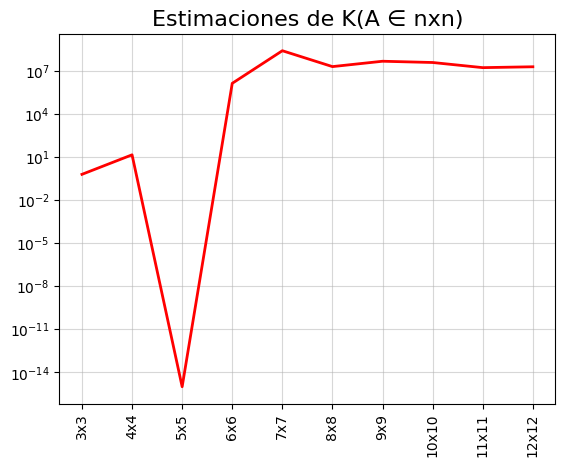

In [28]:
#@title f) ESTIMACIÓN DE LOS NÚMEROS DE CONDICIÓN DE CADA MATRIZ USANDO LA FACTORIZACIÓN LU (LU CON SIMPLE PRECISIÓN)  (*)

# La idea es:

# A * δx = r   
# 1 ->   (obtener L y U de A en doble precisión): LU(A)
# 2 ->   (obtener residuo absoluto r de A en simple precisión): r = b - A𝑥̃ 

# L * U * δx = r   
# 3 ->   (obtener δy): L * δy = r   
# 4 ->   (obtener δx): U * δx = δy
# 5 ->   (obtener K(A)): K(A) = (‖δx‖/‖𝑥̃‖)*(10^t)

# 1 ->   (obtener L y U de A en doble precisión): LU(A)
L_n, U_n = [], []
for i in range(10):
  l, u = LU(A_n[i], 8)
  L_n.append(l)
  U_n.append(u)

# 2 ->   (obtener residuo absoluto r de A en simple precisión): r = b - A𝑥̃ 
r_n = [b_n[i] - b_2p[i] for i in range(10)]

# 3 ->   (obtener [todos los] δy): L * δy = r   
dy_n = [copiar_tabla(r_n[i]) for i in range(10)]
for i in range(10):
  eliminacion_gaussiana(copiar_tabla(L_n[i]), dy_n[i], i+3)

# 4 ->   (obtener [todos los] δx): U * δx = δy
dx_n = [triangulacion_inversa(U_n[i], dy_n[i], i+3) for i in range(10)]

# 5 ->   (obtener K(A)): K(A) = (‖δx‖/‖𝑥̃‖)*(10^t)
K_n = [condicionamiento(dx_n[i], estimados_2p[i], t=15) for i in range(10)] 

# Mostramos los valores
for i in range(10):
  print("K(A ∈", i+3, "x", i+3, ") = ", K_n[i])

# Graficamos los valores
dims = [str(i)+"x"+str(i) for i in range(3,13)]
plt.plot(dims, [i if i!=0 else 1E-15 for i in K_n], lw=2, label="A", color="red")
plt.title("Estimaciones de K(A ∈ nxn)", fontsize=16)
plt.xticks(dims, rotation=90, fontsize=10)
plt.yscale('log') 
plt.grid(True, alpha=0.5)

plt.show()

In [25]:
#@title extra) ESTIMACIÓN DE LOS NÚMEROS DE CONDICIÓN DE CADA MATRIZ USANDO LA FACTORIZACIÓN LU (LU CON DOBLE PRECISIÓN) (*)

L_n_2p, U_n_2p = [], []
for i in range(10):
  l, u = LU(A_n[i])
  L_n_2p.append(l)
  U_n_2p.append(u)
r_n = [b_n[i] - b_2p[i] for i in range(10)] 
dy_n = [copiar_tabla(r_n[i]) for i in range(10)]
for i in range(10):
  eliminacion_gaussiana(copiar_tabla(L_n_2p[i]), dy_n[i], i+3)
dx_n = [triangulacion_inversa(U_n_2p[i], dy_n[i], i+3) for i in range(10)]
K_n_b = [condicionamiento(dx_n[i], estimados_2p[i], t=15) for i in range(10)] 

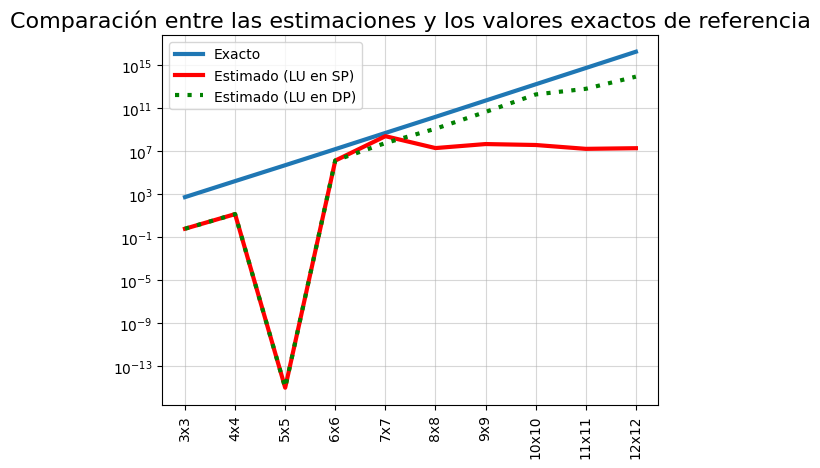

In [29]:
#@title GRÁFICO LOGARÍTMICO DE COMPARACIÓN ( K ESTIMADOS / K EXACTOS )

K_exactos = [5.2E2, 1.6E4, 4.8E5, 1.5E7, 4.8E8, 1.5E10, 4.9E11, 1.6E13, 5.2E14, 1.7E16]

[str(i)+"x"+str(i) for i in range(3,13)]
plt.plot(dims, K_exactos, lw=3, label="Exacto")
plt.plot(dims, [i if i!=0 else 1E-15 for i in K_n], lw=3, label="Estimado (LU en SP)", color="red")
plt.plot(dims, [i if i!=0 else 1E-15 for i in K_n_b], lw=3, label="Estimado (LU en DP)", color="green", linestyle='dashed', dashes=(1, 2))
plt.title("Comparación entre las estimaciones y los valores exactos de referencia", fontsize=16)
plt.xticks(dims, rotation=90, fontsize=10)
plt.yscale('log') 
plt.grid(True, alpha=0.5)
plt.legend()

plt.show()

# CONCLUSIÓN SOBRE LOS RESULTADOS DE K(A):

Después de analizar los resultados obtenidos, se puede concluir que hay una discrepancia significativa entre los valores exactos de los números de condición proporcionados y los valores estimados a través de la fórmula empírica.

Se puede observar que la fórmula empírica funciona bien para matrices pequeñas, ya que los valores estimados se acercan a los valores exactos. Sin embargo, para matrices más grandes, la fórmula empírica no funciona de manera efectiva, ya que los valores estimados son mucho más bajos que los valores exactos.

Esta discrepancia puede explicarse por la sensibilidad de la fórmula empírica al redondeo y a otros errores de aproximación numérica. Además, la factorización LU de la matriz calculada en simple precisión también puede haber introducido errores en los cálculos.

Otro aspecto a tener en cuenta es que la matriz de 5x5 tiene un número de condición nulo, lo que significa que su inversa no existe o no es única. Este comportamiento es debido a que la solución del sistema dependía de un coseno cuyo argumento era un múltiplo de pi/2 en cualquier componente, lo que generaba una ambigüedad en la solución.

#GUARDAR TABLAS COMO .csv

In [ ]:
#@title  X exactos
guardar_resultados_como_csv(exactos, "exactos.csv")

In [ ]:
#@title  X estimados en doble precisión
guardar_resultados_como_csv(estimados_2p, "estimados2p.csv")

In [ ]:
#@title  X estimados en simple precisión
guardar_resultados_como_csv(estimados_1p, "estimados1p.csv")

In [ ]:
#@title  Tabla de errores y residuos en simple y doble precisión
guardar_resultados_como_csv(tabla_er_rr, "tabla_errores_y_residuos.csv")

In [ ]:
#@title  Números de condición estimados
guardar_resultados_como_csv([K_n], "K.csv")